In [38]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("CAPRI_R50_results.csv")

In [52]:
df.set_index("Target",inplace=True)

In [87]:
def discrete_convertion(x):
    if x != 0 :
        
        #my_len = len(my_var)
        #acc = 0 

        if "+" == x :
            return 2
        elif "++" == x:
            return 3
        elif "+++" == x :
            return 4
        elif "*" == x :
            return 1
        
        else:
       # print ("in else")
            return 0
        #elif "**" == n[1:-1] :
        #    med = n[0]

In [88]:
df.columns

Index(['Top-1', 'Top-5', 'Top-10', 'Top1', 'Top5', 'Top10'], dtype='object')

In [89]:
df["Top1"] = df["Top-1"].apply(discrete_convertion)
df["Top5"] = df["Top-5"].apply(discrete_convertion)
df["Top10"] = df["Top-10"].apply(discrete_convertion)


In [90]:
df

,Top-1,Top-5,Top-10,Top1,Top5,Top10
Target,,,,,,
T164,+,+,+,2,2,2
T165,0,0,0,0,0,0
T166,++,++,++,3,3,3
T168,++,++,++,3,3,3
T169,0,0,0,0,0,0
T170-1234,0,0,0,0,0,0
T170-567,0,0,0,0,0,0
T170-89,0,0,+,0,0,2
T174,0,0,0,0,0,0


In [96]:
my_colors_2 = ['#ffffff','#bbbbbb','#007f00' , '#00b200' ,'#00e500']

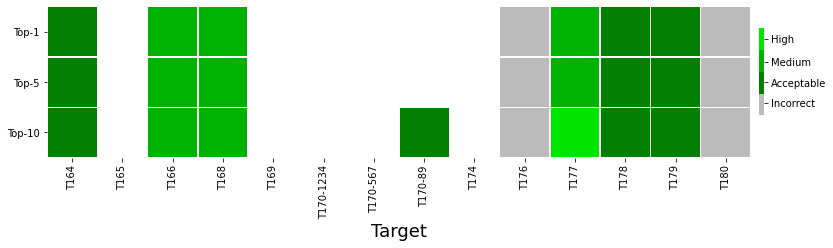

In [113]:
f, ax = plt.subplots(figsize=(15 , 10))

g = sns.heatmap(df[['Top1','Top5','Top10']].T,
#                 cmap="Greens",
                cmap=my_colors_2,
#                 cbar=False,
                square=True,
                linewidths=.5, 
                annot=False,
                cbar_kws={"shrink": .2 ,
                          "ticks":[3.6,2.75,2.0,1.25],
                          "pad":0.009                      
                        }
               )
cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target",size=18)
ax.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)

plt.yticks(rotation=0)
#plt.xticks(rotation=0)# 
plt.savefig("../heatmap_capri_r50_long_v2.svg")

In [108]:
df2_short = df[['Top1','Top5','Top10']].T

In [109]:
df2_short[['T164','T166','T168','T170-89','T176','T177','T178','T179','T180']]

Target,T164,T165,T166,T168,T169,T170-1234,T170-567,T170-89,T174,T176,T177,T178,T179,T180
Top1,2,0,3,3,0,0,0,0,0,1,3,2,2,1
Top5,2,0,3,3,0,0,0,0,0,1,3,2,2,1
Top10,2,0,3,3,0,0,0,2,0,1,4,2,2,1


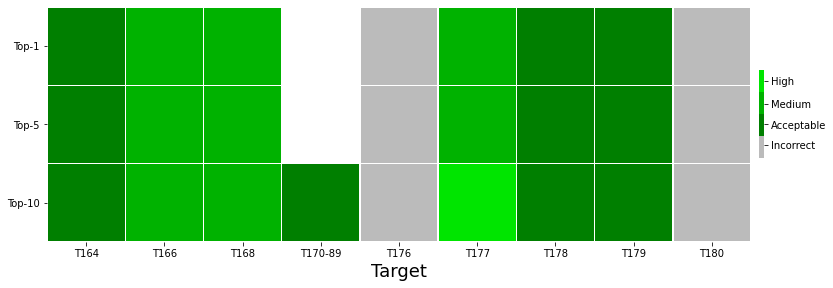

In [112]:
f, ax = plt.subplots(figsize=(15 , 10))

g = sns.heatmap(df2_short[['T164','T166','T168','T170-89','T176','T177','T178','T179','T180']],
#                 cmap="Greens",
                cmap=my_colors_2,
#                 cbar=False,
                square=True,
                linewidths=.5, 
                annot=False,
                cbar_kws={"shrink": .2 ,
                          "ticks":[3.6,2.75,2.0,1.25],
                          "pad":0.009                      
                        }
               )
cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target",size=18)
ax.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)

plt.yticks(rotation=0)
#plt.xticks(rotation=0)# 
plt.savefig("../heatmap_capri_r50_short_v1.svg")